In [126]:
print("sakshi parvekar")

sakshi parvekar


# Multiple Linear Regression

### Importing libraries

In [88]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt

In [89]:
ad=pd.read_csv(r"C:\dataset\50_Startups (1).csv")

## EDA

In [90]:
ad.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [91]:
ad.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [92]:
ad.isnull()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [93]:

df_numeric = ad.select_dtypes(include=['float64', 'int64'])
result = df_numeric.corr()



In [94]:
ad.notnull()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
5,True,True,True,True,True
6,True,True,True,True,True
7,True,True,True,True,True
8,True,True,True,True,True
9,True,True,True,True,True


In [95]:
ad.dropna()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [96]:
ad.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [97]:
x=ad[['R&D Spend']]

In [98]:
x.head()

,R&D Spend
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [99]:
y=ad.Profit

In [100]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

## Splitting data into Training and testing

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1 )

### Creating Linear Regression Model

In [102]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression()

In [103]:
y_pred=lreg.predict(x_test)

## Model evaluation metrics Calculating MAE MSE RMSE R squared

In [104]:
from sklearn import metrics as m

In [105]:
m.mean_absolute_error(y_test,y_pred)

8086.35567265212

In [106]:
m.mean_squared_error(y_test,y_pred)

88393525.80084977

In [107]:
np.sqrt(m.mean_squared_error(y_test,y_pred))

9401.78311815635

In [108]:
m.r2_score(y_test,y_pred)

0.9610399086371776

In [109]:
y_train_pred= lreg.predict(x_train)

m.r2_score(y_train,y_train_pred)

0.9384876517801736

In [110]:
ad

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [111]:
ad.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [112]:
ad.shape

(50, 5)

### Dealing with Seaborn Libarry

In [113]:
import seaborn as sns
import warnings

C:\Users\NetComm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


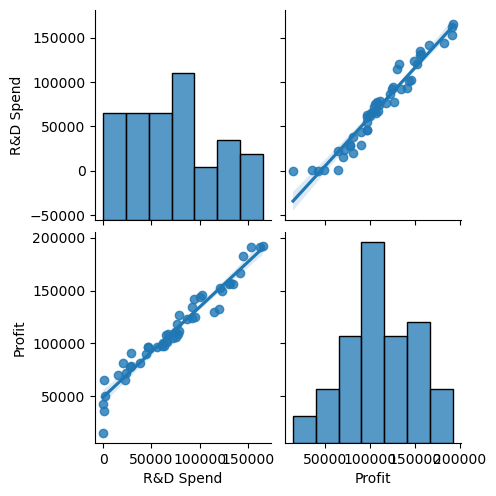

In [114]:
sns.pairplot(ad,vars=['R&D Spend','Profit'],kind='reg')

C:\Users\NetComm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


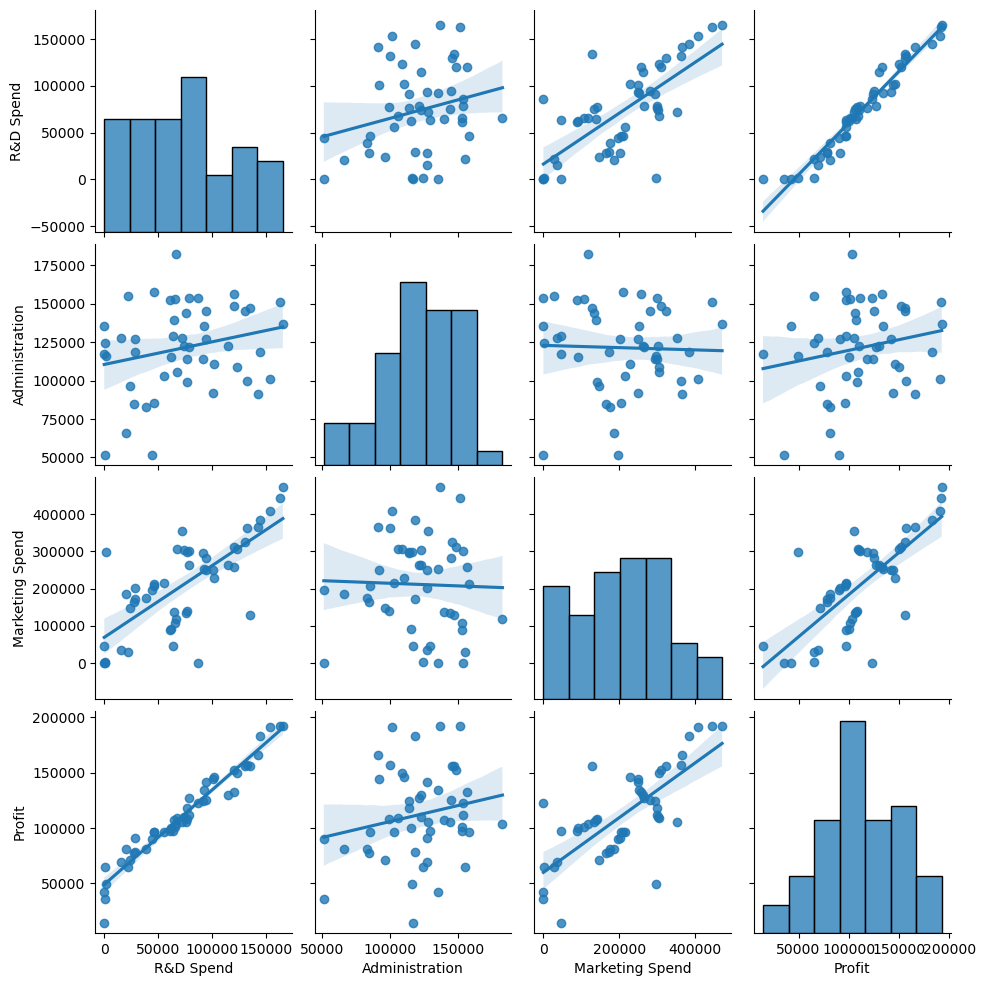

In [115]:
sns.pairplot(ad,kind="reg")

### Confusion Matrix

<Axes: >

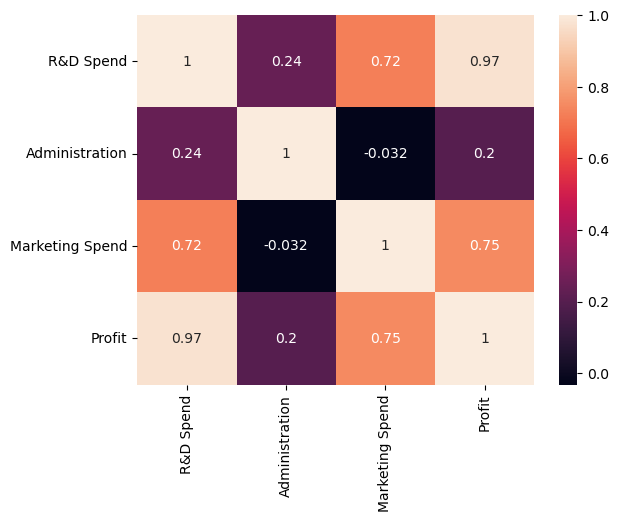

In [116]:
sns.heatmap(df_numeric.corr(),annot=True)

In [117]:
x=ad[[
'R&D Spend','Administration','Marketing Spend','State','Profit']]

In [118]:
print(x)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [119]:
y=ad.Profit

In [120]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [121]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1 )

In [122]:
print(x_train)

    R&D Spend  Administration  Marketing Spend       State     Profit
32   63408.86       129219.61         46085.25  California   97427.84
39   38558.51        82982.09        174999.30  California   81005.76
21   78389.47       153773.43        299737.29    New York  111313.02
36   28663.76       127056.21        201126.82     Florida   90708.19
19   86419.70       153514.11             0.00    New York  122776.86
42   23640.93        96189.63        148001.11  California   71498.49
49       0.00       116983.80         45173.06  California   14681.40
26   75328.87       144135.98        134050.07     Florida  105733.54
22   73994.56       122782.75        303319.26     Florida  110352.25
13   91992.39       135495.07        252664.93  California  134307.35
41   27892.92        84710.77        164470.71     Florida   77798.83
17   94657.16       145077.58        282574.31    New York  125370.37
45    1000.23       124153.04          1903.93    New York   64926.08
24   77044.01       

In [123]:
print(x_test)


    R&D Spend  Administration  Marketing Spend       State     Profit
27   72107.60       127864.55        353183.81    New York  105008.31
35   46014.02        85047.44        205517.64    New York   96479.51
40   28754.33       118546.05        172795.67  California   78239.91
38   20229.59        65947.93        185265.10    New York   81229.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
48     542.05        51743.15             0.00    New York   35673.41
29   65605.48       153032.06        107138.38    New York  101004.64
46    1315.46       115816.21        297114.46     Florida   49490.75
31   61136.38       152701.92         88218.23    New York   97483.56


### Intercept and coefficient

In [124]:
lreg.intercept_

50006.98605287172

In [125]:
lreg.coef_

array([0.83483889])